# Array vs linked list

In [1]:
import sys
import numpy as np
from collections import deque
from pprint import pprint

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
N_bank = np.logspace(6, 9, 20, dtype=np.int)
print(N_bank)

[   1000000    1438449    2069138    2976351    4281332    6158482
    8858667   12742749   18329807   26366508   37926901   54555947
   78475997  112883789  162377673  233572146  335981828  483293023
  695192796 1000000000]


In [4]:
dt_a1 = []
dt_a2 = []
dt_l1 = []
dt_l2 = []

In [5]:
for (k, N) in enumerate(N_bank):
    print("Processing k={}, N={}".format(k, N))
    # a = np.random.randint(128, size=N, dtype=np.int8)
    a = np.empty(N, dtype=np.int8)
    l = deque([None] * N)

    dt = %timeit -o -q a[N//2]
    dt_a1.append(dt)
    
    dt = %timeit -o -q np.append(a, -99)
    dt_a2.append(dt)

    dt = %timeit -o -q l[N//2]
    dt_l1.append(dt)
    
    dt = %timeit -o -q l.append(-99)
    dt_l2.append(dt)


Processing k=0, N=1000000
Processing k=1, N=1438449
Processing k=2, N=2069138
Processing k=3, N=2976351
Processing k=4, N=4281332
Processing k=5, N=6158482
Processing k=6, N=8858667
Processing k=7, N=12742749
Processing k=8, N=18329807
Processing k=9, N=26366508
Processing k=10, N=37926901
Processing k=11, N=54555947
Processing k=12, N=78475997
Processing k=13, N=112883789
Processing k=14, N=162377673
Processing k=15, N=233572146
Processing k=16, N=335981828
Processing k=17, N=483293023
Processing k=18, N=695192796
Processing k=19, N=1000000000


In [6]:
def doPlot(x, y, label=None):
    plt.loglog(x, y, '-o', linewidth=0.95)
    plt.grid(True)


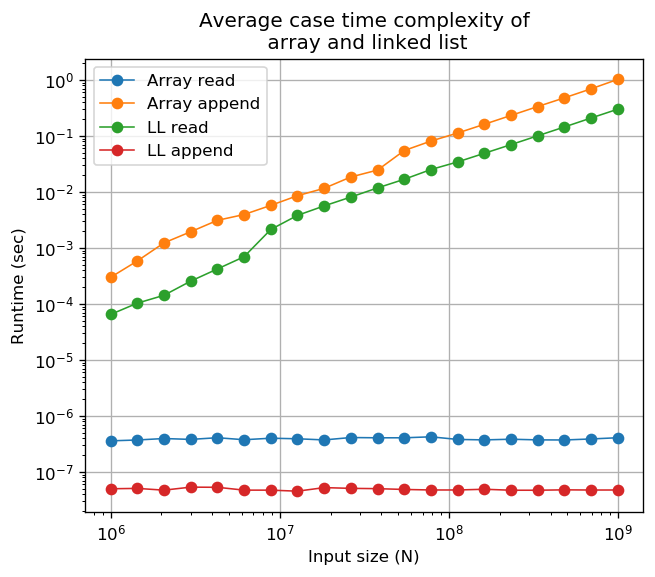

In [7]:
fig = plt.figure(figsize=(6,5),dpi=120)
axes = fig.add_subplot(111)
doPlot(N_bank, [D.average for D in dt_a1])
doPlot(N_bank, [D.average for D in dt_a2])
doPlot(N_bank, [D.average for D in dt_l1])
doPlot(N_bank, [D.average for D in dt_l2])
plt.legend(("Array read", "Array append", "LL read", "LL append", ));
plt.xlabel("Input size (N)");
plt.ylabel("Runtime (sec)");
plt.title("Average case time complexity of\n array and linked list");

